<a href="https://colab.research.google.com/github/ILMNX/machine-learning/blob/main/k-means2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from urllib.request import urlopen

In [ ]:
url = "https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/credit_dataset.csv"
df = pd.read_csv(urlopen(url))

df

,customer_id,balance_number,balance_frequency,purchases_number,purchases_conditional,purchases_installment,purchases_cash,purchases_frequency,purchases_frequency_conditional,purchases_frequency_installment,...,purchases_cash_advance,purchases_trx,limit_credit,payment_number,payment_minimum,payment_total,tenure,tax_number,tax_cash,tax_total
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,NaN,NaN,NaN
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,NaN,NaN,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,NaN,NaN,NaN
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,NaN,0.000000,12,NaN,NaN,NaN
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,325.594462,48.886365,0.500000,6,NaN,NaN,NaN
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,275.861322,NaN,0.000000,6,NaN,NaN,NaN
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,0,5,1000.0,81.270775,82.418369,0.250000,6,NaN,NaN,NaN
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6,NaN,NaN,NaN


In [ ]:
# Pilih fitur yang akan digunakan untuk klasterisasi
features = df.drop(['customer_id'], axis=1)
#count nan
features.isna().sum()


balance_number                        0
balance_frequency                     0
purchases_number                      0
purchases_conditional                 0
purchases_installment                 0
purchases_cash                        0
purchases_frequency                   0
purchases_frequency_conditional       0
purchases_frequency_installment       0
purchases_cash_frequency              0
purchases_cash_advance                0
purchases_trx                         0
limit_credit                          1
payment_number                        0
payment_minimum                     313
payment_total                         0
tenure                                0
tax_number                         8950
tax_cash                           8950
tax_total                          8950
dtype: int64

In [ ]:
nan_columns = features.columns[features.isna().all()].tolist()
if nan_columns:
    print("Kolom dengan semua nilai NaN:", nan_columns)
    features.drop(columns=nan_columns, inplace=True)


Kolom dengan semua nilai NaN: ['tax_number', 'tax_cash', 'tax_total']


In [ ]:

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Menentukan jumlah klaster yang optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


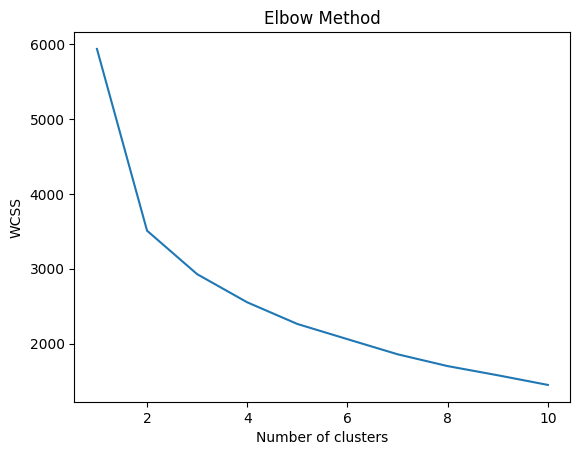

In [ ]:
# Menampilkan Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:

# Pilih jumlah klaster berdasarkan elbow method
# memilih 3 karena setelah cluster 3 nilai menjadi linear
num_clusters = 3

# Melakukan klasterisasi menggunakan algoritma k-means
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)  # Eksplisit set n_init
clusters = kmeans.fit_predict(scaled_features)

In [ ]:
# Menambahkan kolom kluster ke dataframe
df['Cluster'] = clusters


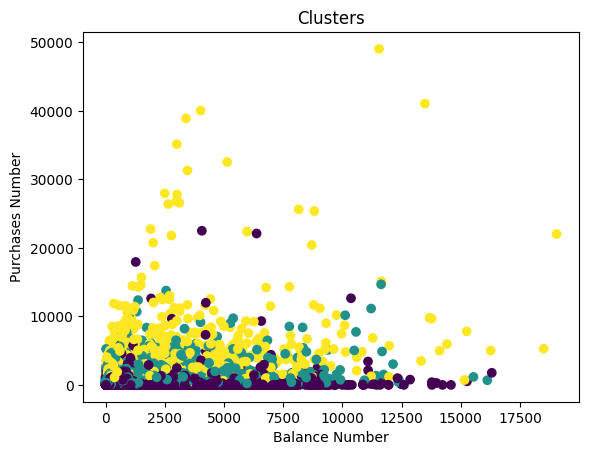

In [ ]:
# Visualisasi kluster menggunakan scatter plot
plt.scatter(df['balance_number'], df['purchases_number'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Balance Number')
plt.ylabel('Purchases Number')
plt.title('Clusters')
plt.show()


In [ ]:
# Menghitung dan menampilkan Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3723948225544862
